## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path, encoding="utf-8")
study_results = pd.read_csv(study_results_path, encoding="utf-8")

# Combine the data into a single dataset
combine_mouse_study_df = pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combine_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
mouse_count=len(combine_mouse_study_df["Mouse ID"].unique())

In [3]:
# Checking the number of mice.
mouse_count= len(combine_mouse_study_df["Mouse ID"].unique())
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df= combine_mouse_study_df[combine_mouse_study_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
filter_df=combine_mouse_study_df['Mouse ID']=='g989'
# filter_df
mouse_g989_all_data_df=combine_mouse_study_df[filter_df]
mouse_g989_all_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_mouse_data_df= combine_mouse_study_df.drop_duplicates(subset=['Mouse ID', "Timepoint"])
filter_df=combine_mouse_study_df['Mouse ID']!='g989'
# filter_df
clean_mouse_data_df= combine_mouse_study_df[filter_df]
clean_mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count= len(clean_mouse_data_df["Mouse ID"].unique())
clean_mouse_count

248

## Summary Statistics

In [8]:
clean_mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_volume_mean = clean_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_volume_median = clean_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume_variance = clean_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_std = clean_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_sem = clean_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.

central_data_mapping={
    'Mean': tumor_volume_mean, 
    'Median': tumor_volume_median,
    'Variance':tumor_volume_variance,
    'Standard Deviation':tumor_volume_std,
    'SEM':tumor_volume_sem}

pd.DataFrame(central_data_mapping)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_names_df= clean_mouse_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var", "std","sem"]})
drug_names_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [11]:
drug_names_df.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

## Bar and Pie Charts

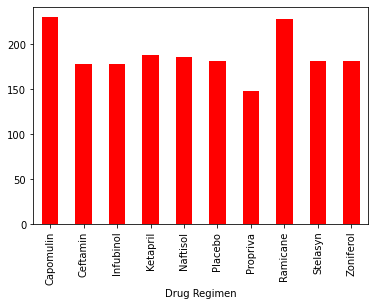

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_clean_group_df=clean_mouse_data_df.groupby('Drug Regimen')['Mouse ID'].count()
mice_clean_group_df.plot(kind='bar', facecolor='red')

In [13]:
mice_clean_group_df.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

In [14]:
mice_clean_group_df.values

array([230, 178, 178, 188, 186, 181, 148, 228, 181, 182], dtype=int64)

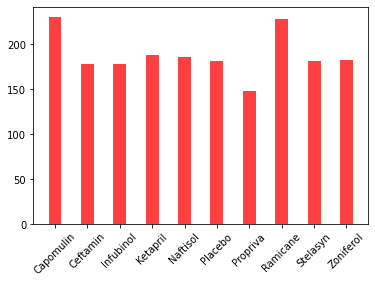

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x=mice_clean_group_df.index
y=mice_clean_group_df.values

plt.bar(x, y, facecolor="red", alpha=0.75, align="center", width = 0.4)
plt.xticks(rotation = 45)
plt.show()

In [16]:
mouse_sex_df= pd.DataFrame(clean_mouse_data_df["Sex"].value_counts())
mouse_sex_df

,Sex
Male,958
Female,922


In [17]:
mouse_sex_df.index

Index(['Male', 'Female'], dtype='object')

In [18]:
mouse_sex_df.values

array([[958],
       [922]], dtype=int64)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E7501F5B0>],
      dtype=object)

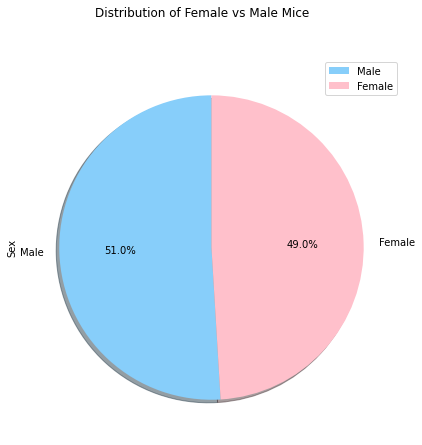

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex_df= pd.DataFrame(clean_mouse_data_df["Sex"].value_counts())

mouse_sex_df.plot(kind='pie', title="Distribution of Female vs Male Mice", subplots=True, shadow = True, startangle=90,
                  figsize=(10,7), autopct='%1.1f%%', colors = ['lightskyblue','pink'] )


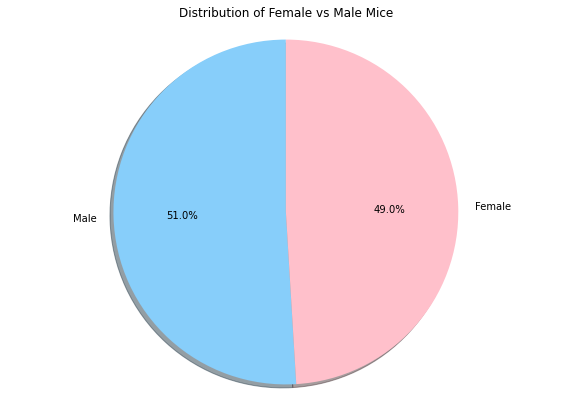

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex= ['Male','Female']
data= [958, 922]
colors = ["lightskyblue","pink"]

# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.title("Distribution of Female vs Male Mice")
plt.pie(data, labels = sex, colors=colors, 
       autopct= "%1.1f%%", shadow= True, startangle=90) 


plt.axis("equal") 
#show plot 
plt.show() 


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_selection=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


In [22]:
drug_selection_filter_df= clean_mouse_data_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

# displaying data with both filter applied and mandatory  
applied_drug_selection_filter_df= clean_mouse_data_df[drug_selection_filter_df] 
applied_drug_selection_filter_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [23]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = applied_drug_selection_filter_df.groupby("Mouse ID")["Timepoint"].max()


In [24]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatment_regimens_df= pd.merge(last_timepoint_df,applied_drug_selection_filter_df, how="inner", on=["Mouse ID","Timepoint"])
treatment_regimens_df= treatment_regimens_df.rename(columns={"Timepoint": "Last Timepoint"})


treatment_regimens_df

,Mouse ID,Last Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]
tumor_vol= treatment_regimens_df['Tumor Volume (mm3)']

In [26]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = treatment_regimens_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")
print(f"The interquartile range of tumor volumes is: {iqr}")

The lower quartile of tumor volumes is: 37.187743802499995
The upper quartile of tumor volumes is: 59.930261755000004
The the median of tumor volumes is: 45.0 
The interquartile range of tumor volumes is: 22.74251795250001


In [27]:
 # Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_final_tumor_volume=[]
ramicaner_final_tumor_volume=[]
infubinol_final_tumor_volume=[]
ceftamin_final_tumor_volume=[]

capomulin_filter_df= treatment_regimens_df['Drug Regimen']=="Capomulin"
capomulin_data_df= treatment_regimens_df[capomulin_filter_df]
capomulin_final_tumor_volume= capomulin_data_df['Tumor Volume (mm3)']

ramicaner_filter_df= treatment_regimens_df['Drug Regimen']=="Ramicane"
ramicaner_data_df= treatment_regimens_df[ramicaner_filter_df]
ramicaner_final_tumor_volume= ramicaner_data_df['Tumor Volume (mm3)']

infubinol_filter_df= treatment_regimens_df['Drug Regimen']=="Infubinol"
infubinol_data_df= treatment_regimens_df[infubinol_filter_df]
infubinol_final_tumor_volume= capomulin_data_df['Tumor Volume (mm3)']

ceftamin_filter_df= treatment_regimens_df['Drug Regimen']=="Ceftamin"
ceftamin_data_df= treatment_regimens_df[ceftamin_filter_df]
ceftamin_final_tumor_volume= ceftamin_data_df['Tumor Volume (mm3)']


In [28]:
# add subset  
# Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


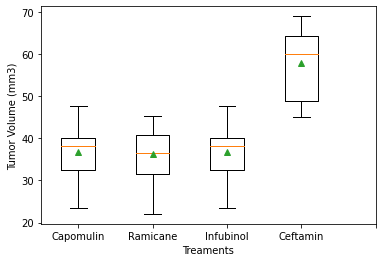

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig.suptitle("Final Tumor Volume", fontsize=16, fontweight="bold")

ticks= [1,2,3,4,5]
labels=list(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.boxplot([capomulin_final_tumor_volume,ramicaner_final_tumor_volume, 
             infubinol_final_tumor_volume,ceftamin_final_tumor_volume], showmeans=True)

# set axes limits and labels
plt.xlabel("Treaments")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(ticks,labels)

plt.show()


## Line and Scatter Plots

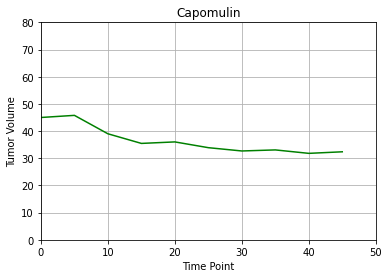

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Create the X and Y axis lists
capomulin_all_data_filter_df= applied_drug_selection_filter_df['Drug Regimen']=="Capomulin"
capomulin_all_data_df= applied_drug_selection_filter_df[capomulin_all_data_filter_df]

# Choose a Mouse
mouse_filter_df= capomulin_all_data_df['Mouse ID']=='r554'
mouse_r554_data_df= capomulin_all_data_df[mouse_filter_df]

mouse_r554_time_point= mouse_r554_data_df['Timepoint']
mouse_r554_tumor_volume= mouse_r554_data_df['Tumor Volume (mm3)']

# Plot the charts and apply some styling
mouse_r554 = plt.plot(mouse_r554_time_point, mouse_r554_tumor_volume, color="green", label="Mouse-r554")

# Add labels to X and Y axes :: Add title
plt.title("Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")

# Set the limits for the X and Y axes
plt.xlim(0,50)
plt.ylim(0,80)

plt.grid()
plt.show()

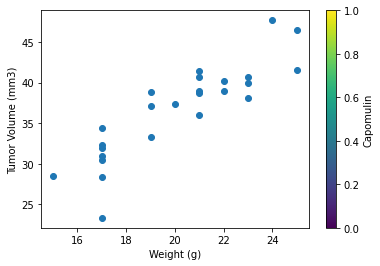

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = capomulin_data_df['Weight (g)']
average_tumor_volume = capomulin_data_df['Tumor Volume (mm3)']

plt.scatter(mouse_weight,average_tumor_volume)
clb = plt.colorbar()
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
clb.set_label('Capomulin')
plt.show()

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.88


The r-squared is: 0.7686134812139006


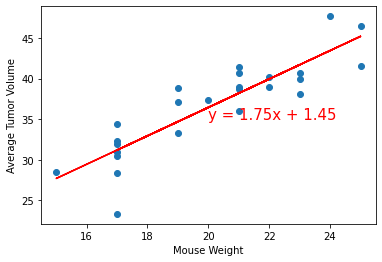

In [33]:
from scipy.stats import linregress

x_values = capomulin_data_df['Weight (g)']
y_values = capomulin_data_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()